# Curso: "El lenguaje de programación Python para la docencia en el ámbito científico"

&nbsp;  
<img src="../images/logo_python_letras.png" align="center" style="width:350px;"/>

<strong><div style="text-align: center"> [Mabel Delgado Babiano](https://es.linkedin.com/in/mabeldelgadob)</div></strong>

&nbsp;  
<div style="text-align: center">Heredia, Costa Rica</div>
<div style="text-align: center">4 - 7 Febrero 2019</div>


# NumPy: Entrada/Salida

*En esta clase vamos a aprender a **leer y escribir ficheros de datos con NumPy**, ya que es algo que necesitaremos hacer con relativa frecuencia.*
  
 *¿Estás preparado/a? ¡¡Pues Empezamos!!*

## A. Ejemplo con datos de temperaturas 

### A.1. Leer los datos y trabajar con ellos

Para practicar, vamos a leer el archivo `temperaturas.csv` que contiene datos diarios de temperaturas en Nueva York entre el 1 de enero de 2013 y el 1 de enero de 2014, obtenidos gratuitamente de http://ncdc.noaa.gov/. Como los hemos descargado en formato CSV habrá que tener algunas precauciones a la hora de leer el archivo.

In [28]:
# preserve

# Windows
#!type ..\data\temperaturas.csv

# Linux
!head ../data/temperaturas.csv

STATION,DATE,TMAX,TMIN
GHCND:USW00094728,20130101,44,-33
GHCND:USW00094728,20130102,6,-56
GHCND:USW00094728,20130103,0,-44
GHCND:USW00094728,20130104,28,-11
GHCND:USW00094728,20130105,56,0
GHCND:USW00094728,20130106,78,11
GHCND:USW00094728,20130107,72,28
GHCND:USW00094728,20130108,89,17
GHCND:USW00094728,20130109,94,39


In [29]:
# importamos numpy
import numpy as np

In [30]:
# Cargando los datos
datos = np.loadtxt("../data/temperaturas.csv",
                   skiprows=1,  # Saltamos una línea
                   usecols=(1, 2, 3),  # Solo columnas 2, 3 y 4
                   delimiter=',')  # Separados por comas

In [31]:
datos[:9]

array([[ 2.0130101e+07,  4.4000000e+01, -3.3000000e+01],
       [ 2.0130102e+07,  6.0000000e+00, -5.6000000e+01],
       [ 2.0130103e+07,  0.0000000e+00, -4.4000000e+01],
       [ 2.0130104e+07,  2.8000000e+01, -1.1000000e+01],
       [ 2.0130105e+07,  5.6000000e+01,  0.0000000e+00],
       [ 2.0130106e+07,  7.8000000e+01,  1.1000000e+01],
       [ 2.0130107e+07,  7.2000000e+01,  2.8000000e+01],
       [ 2.0130108e+07,  8.9000000e+01,  1.7000000e+01],
       [ 2.0130109e+07,  9.4000000e+01,  3.9000000e+01]])

La primera columna es un entero con formato "AAAAMMDD" que vamos a ignorar. Las temperaturas están medidas en décimas de grado Celsius, así que hay que pasarlas a grados Celsius. Vamos a calcular también la temperatura media.

In [32]:
# Tmax = 
# Tmin = 
# Tavg = 

Tmax = datos[:, 1] / 10
Tmin = datos[:, 2] / 10
Tavg = (Tmax + Tmin) / 2

Como vamos a ignorar la columna de las fechas tenemos que crear un dominio para el eje x. Simplemente construiremos un array de enteros desde 0 hasta 365.

In [33]:
x = np.arange(366)

###Representar los datos

A continuación, vamos a representar la evolución de la temperatura media (por ejemplo de color negro), indicando "Daily summaries" en el título, "Days" en el eje x y "Temperature (C)" en el eje y, usando la interfaz orientada a objetos de matplotlib (función `plt.subplots`). Podemos crear una zona rellena entre la máxima y la mínima con la función `fill_between(x, max, min)` (por ejemplo de color #4f88b1). Si los límites del eje x no quedan como queremos podemos usar la función `set_xlim(xmin, xmax)`.

### A.2. Representar los datos

In [35]:
import matplotlib.pyplot as plt

Text(0,0.5,'Temperatura (C)')

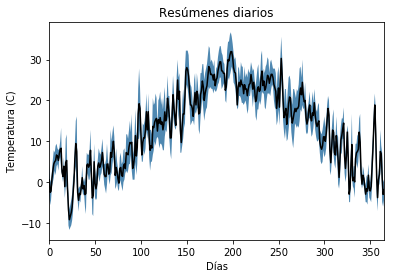

In [36]:
fig, ax = plt.subplots()

ax.plot(x, Tavg, 'k')
ax.set_xlim(x.min(), x.max())  
ax.fill_between(x, Tmin, Tmax, facecolor='#4f88b1', edgecolor='none')
ax.set_title("Resúmenes diarios")
ax.set_xlabel("Días")
ax.set_ylabel("Temperatura (C)")

### A.3. Guardar los datos nuevos

Supongamos que ahora queremos guardar nuestra tabla de datos en un archivo txt, para poder cargarlo ya modificado más adelante. Una manera fácil de hacerlo sería con otra función de NumPy: `np.savetxt`. Lo usaremos con los argumentos opcionales  `fmt='%.5f', newline = '\r\n'` para obtener un fichero *bonito* que podamos entender de un vistazo.

In [34]:
# Creamos el array donde guardaremos los datos
matriz_datos = np.zeros([366, 4])

# Guardamos por columnas
matriz_datos[:, 0] = x
matriz_datos[:, 1] = Tmax
matriz_datos[:, 2] = Tmin
matriz_datos[:, 3] = Tavg

# Comprobamos el contenido
print(matriz_datos[:10])

# Salvamos en un txt
np.savetxt('archivo_datos.txt', matriz_datos, fmt='%.5f', newline = '\r\n', delimiter=";")

[[ 0.    4.4  -3.3   0.55]
 [ 1.    0.6  -5.6  -2.5 ]
 [ 2.    0.   -4.4  -2.2 ]
 [ 3.    2.8  -1.1   0.85]
 [ 4.    5.6   0.    2.8 ]
 [ 5.    7.8   1.1   4.45]
 [ 6.    7.2   2.8   5.  ]
 [ 7.    8.9   1.7   5.3 ]
 [ 8.    9.4   3.9   6.65]
 [ 9.    8.3   4.4   6.35]]


---

## B. Ejemplo datos calidad del aire 

In [14]:
from IPython.display import HTML
HTML('<iframe src="http://www.mambiente.munimadrid.es/sica/scripts/index.php" \
            width="700" height="400"></iframe>')

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### B.1. Cargando los datos

In [37]:
# preserve

# Windows command
# !type ..\data\barrio_del_pilar-20160322.csv

# Linux command 
!head ../data/barrio_del_pilar-20160322.csv

﻿Estación: Barrio del Pilar;;;;
Fecha;Hora;CO;NO2;O3
;;mg/m³;µg/m³;µg/m³
22/03/2016;01:00;0.2;14;73
22/03/2016;02:00;0.2;10;77
22/03/2016;03:00;0.2;9;75
22/03/2016;04:00;0.2;3;81
22/03/2016;05:00;0.2;3;81
22/03/2016;06:00;0.2;6;79
22/03/2016;07:00;0.2;24;59


Usaremos la función `loadtxt` para cargar los datos de 2016  en un array. Usaremos los argumentos opcionales `skiprows`, `delimiter` y `usecols` para captar los datos que queremos.

In [38]:
# loading the data:
# ./data/barrio_del_pilar-20160322.csv
data1 = np.loadtxt('../data/barrio_del_pilar-20160322.csv', skiprows=3, delimiter=';', usecols=(2,3,4))
data1[:10,:]

array([[ 0.2, 14. , 73. ],
       [ 0.2, 10. , 77. ],
       [ 0.2,  9. , 75. ],
       [ 0.2,  3. , 81. ],
       [ 0.2,  3. , 81. ],
       [ 0.2,  6. , 79. ],
       [ 0.2, 24. , 59. ],
       [ 0.3, 48. , 37. ],
       [ 0.3, 40. , 43. ],
       [ 0.3, 41. , 44. ]])

### Valores inexistentes

El archivo que contiene los datos de 2015 tiene algunos agujeros por errores de medida. Como alternativa a `loadtxt`, podremos usar la función `genfromtxt`, teniendo cuidado de que el ella el argumento opcional de saltar líneas pasa a llamarse `skip_header`.

In [39]:
# Windows command
!type ..\data\barrio_del_pilar-20151222.csv

# Linux command 
# !head ../data/barrio_del_pilar-20151222.csv

..databarrio_del_pilar-20151222.csv: not found


In [40]:
# loading the data:
#../data/barrio_del_pilar-20151222.csv
data1 = np.loadtxt('../data/barrio_del_pilar-20151222.csv', skiprows=3, delimiter=';', usecols=(2,3,4))
data1[:10,:]

ValueError: could not convert string to float: '-'

In [41]:
#Loading the data 2:
#../data/barrio_del_pilar-20151222.csv
data2 = np.genfromtxt('../data/barrio_del_pilar-20151222.csv', skip_header=3, delimiter=';', usecols=(2,3,4))
data2[:10,:]

array([[ 0.5, 65. ,  7. ],
       [ 0.4, 50. ,  7. ],
       [ 0.3, 37. , 11. ],
       [ 0.3, 37. , 10. ],
       [ 0.3, 29. , 17. ],
       [ 0.3, 36. , 13. ],
       [ 0.3, 47. ,  7. ],
       [ 0.4, 57. ,  6. ],
       [ 0.5, 67. ,  6. ],
       [ 0.5, 69. ,  8. ]])

In [42]:
# Media
np.mean(data2, axis=0)

array([nan, nan, nan])

In [43]:
# Media sin nan
np.nanmean(data2, axis=0)

array([ 0.64179894, 67.57671958, 17.3       ])

In [44]:
# masking invalid data
data2_mask = np.ma.masked_invalid(data2)
data2_mask

masked_array(
  data=[[0.5, 65.0, 7.0],
        [0.4, 50.0, 7.0],
        [0.3, 37.0, 11.0],
        [0.3, 37.0, 10.0],
        [0.3, 29.0, 17.0],
        [0.3, 36.0, 13.0],
        [0.3, 47.0, 7.0],
        [0.4, 57.0, 6.0],
        [0.5, 67.0, 6.0],
        [0.5, 69.0, 8.0],
        [0.5, 67.0, 11.0],
        [0.5, 64.0, 15.0],
        [0.5, 65.0, 21.0],
        [0.5, 68.0, 24.0],
        [0.7, 91.0, 19.0],
        [0.8, 105.0, 13.0],
        [0.8, 102.0, 10.0],
        [0.7, 100.0, 8.0],
        [1.5, 148.0, 7.0],
        [2.7, 223.0, 7.0],
        [2.0, 204.0, 7.0],
        [3.3, 251.0, 7.0],
        [3.0, 264.0, 7.0],
        [2.0, 204.0, 7.0],
        [1.2, 127.0, 6.0],
        [0.4, 61.0, 7.0],
        [0.3, 46.0, 9.0],
        [0.3, 47.0, 7.0],
        [0.5, 44.0, 6.0],
        [0.5, 45.0, 6.0],
        [0.5, 46.0, 6.0],
        [0.4, 53.0, 6.0],
        [0.5, 69.0, 6.0],
        [0.9, 90.0, 7.0],
        [0.4, 51.0, 11.0],
        [0.4, 52.0, 16.0],
        [0.4, 56.0, 20.0],


In [45]:
np.mean(data2_mask, axis=0)

masked_array(data=[0.6417989417989418, 67.57671957671958, 17.3],
             mask=[False, False, False],
       fill_value=1e+20)

Probemos a calcular la diferencia entre ambos años:

In [46]:
data_dif = data1 - data2
data_dif[:10,:]

array([[ -0.3, -51. ,  66. ],
       [ -0.2, -40. ,  70. ],
       [ -0.1, -28. ,  64. ],
       [ -0.1, -34. ,  71. ],
       [ -0.1, -26. ,  64. ],
       [ -0.1, -30. ,  66. ],
       [ -0.1, -23. ,  52. ],
       [ -0.1,  -9. ,  31. ],
       [ -0.2, -27. ,  37. ],
       [ -0.2, -28. ,  36. ]])

### B.2. Representando los datos

**Valores máximos** obtenidos de: http://www.mambiente.munimadrid.es/opencms/export/sites/default/calaire/Anexos/valores_limite_1.pdf

* NO2
    - Media anual: 40 µg/m3
    - **Media horaria: 200 µg/m3 **

(0, 220)

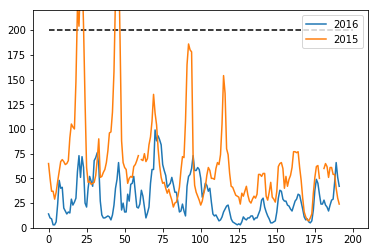

In [22]:
# evolución a lo largo del día
plt.plot(data1[:, 1], label='2016')
plt.plot(data2[:, 1], label='2015')
# leyenda
plt.legend()
# línea horizontal: valor límite
plt.hlines(200, 0, 200, linestyles='--')
plt.ylim(0, 220)

In [47]:
from IPython.display import HTML
HTML('<iframe src="http://ccaa.elpais.com/ccaa/2015/12/24/madrid/1450960217_181674.html" width="700" height="400"></iframe>')

* CO 
    - **Máxima diaria de las medias móviles octohorarias: 10 mg/m³**

In [24]:
# http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.convolve.html
def moving_average(x, N=8):
    return np.convolve(x, np.ones(N)/N, mode='same')

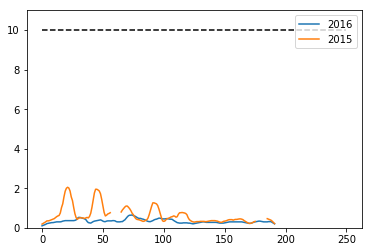

In [25]:
plt.plot(moving_average(data1[:, 0]), label='2016')

plt.plot(moving_average(data2[:, 0]), label='2015')

plt.hlines(10, 0, 250, linestyles='--')
plt.ylim(0, 11)

plt.legend()

* O3
    - **Máxima diaria de las medias móviles octohorarias: 120 µg/m3**
    - Umbral de información. 180 µg/m3
    - Media horaria. Umbral de alerta. 240 µg/m3

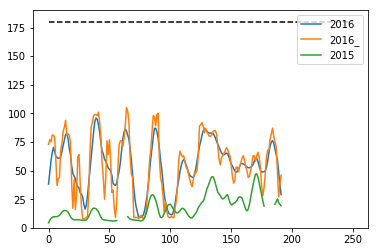

In [26]:
plt.plot(moving_average(data1[:, 2]), label='2016')
plt.plot(data1[:, 2], label='2016_')
#plt.plot(data1[:, 2])

plt.plot(moving_average(data2[:, 2]), label='2015')
#plt.plot(data2[:, 2])

plt.hlines(180, 0, 250, linestyles='--')
plt.ylim(0, 190)

plt.legend()

## C. ¿Cómo leeríamos un archivo sin usar NumPy?

In [27]:
data_file = '../data/barrio_del_pilar-20151222.csv'

In [28]:
data = []

with open(data_file) as f:
    # Saltamos las tres primeras líneas
    for ii in range(3):
        f.readline()
    
    for line in f:
        line_string = line
        line_list = line.split(';')
        
        date = line_list[0]
        hour = line_list[1]
        
        components_data = []
        for c in line_list[2:]:
            if '-' not in c:
                components_data.append(float(c))
            else:
                components_data.append(np.nan)
        data.append(components_data)
        
print(np.array(data))    

[[5.00e-01 6.50e+01 7.00e+00]
 [4.00e-01 5.00e+01 7.00e+00]
 [3.00e-01 3.70e+01 1.10e+01]
 [3.00e-01 3.70e+01 1.00e+01]
 [3.00e-01 2.90e+01 1.70e+01]
 [3.00e-01 3.60e+01 1.30e+01]
 [3.00e-01 4.70e+01 7.00e+00]
 [4.00e-01 5.70e+01 6.00e+00]
 [5.00e-01 6.70e+01 6.00e+00]
 [5.00e-01 6.90e+01 8.00e+00]
 [5.00e-01 6.70e+01 1.10e+01]
 [5.00e-01 6.40e+01 1.50e+01]
 [5.00e-01 6.50e+01 2.10e+01]
 [5.00e-01 6.80e+01 2.40e+01]
 [7.00e-01 9.10e+01 1.90e+01]
 [8.00e-01 1.05e+02 1.30e+01]
 [8.00e-01 1.02e+02 1.00e+01]
 [7.00e-01 1.00e+02 8.00e+00]
 [1.50e+00 1.48e+02 7.00e+00]
 [2.70e+00 2.23e+02 7.00e+00]
 [2.00e+00 2.04e+02 7.00e+00]
 [3.30e+00 2.51e+02 7.00e+00]
 [3.00e+00 2.64e+02 7.00e+00]
 [2.00e+00 2.04e+02 7.00e+00]
 [1.20e+00 1.27e+02 6.00e+00]
 [4.00e-01 6.10e+01 7.00e+00]
 [3.00e-01 4.60e+01 9.00e+00]
 [3.00e-01 4.70e+01 7.00e+00]
 [5.00e-01 4.40e+01 6.00e+00]
 [5.00e-01 4.50e+01 6.00e+00]
 [5.00e-01 4.60e+01 6.00e+00]
 [4.00e-01 5.30e+01 6.00e+00]
 [5.00e-01 6.90e+01 6.00e+00]
 [9.00e-01

--- 

__Referencias__

Material adaptado del "Curso AeroPython". AeroPython. https://github.com/AeroPython/Curso_AeroPython<br>

 <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para aplicarla el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [22]:
# //preserve//
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/style.css'
HTML(open(css_file, "r").read())